In [2]:
import pandas as pd

 data = {
    'Name' : ['Rob' , 'Michael' , 'Mohan' , 'Ismail' , 'Kory' , 'Gautam' , 'David' , 'Andrea' , 'Brad' , 'Angelina' , 'Tom ' , 'Arnold','Jared','Stark','Ranbir','Dipia' , 'Priyanka' , 'Nick' ,'Alia','Sid','Abdul' ],
    'Age' : [27,29,29,28,42,39,41,38,36,35,37,26,27,28,29,32,40,41,43,39,41,39],
    'Income($)':[70000,90000,61000,60000,150000,155000,160000,162000,156000,130000,137000,45000,48000,51000,49500,53000,65000,63000,64000,80000,82000,58000]
}

In [3]:
data = { 'Name' : ['Rob' , 'Michael' , 'Mohan' , 'Ismail' , 'Kory' , 'Gautam' , 'David' , 'Andrea' , 'Brad' , 'Angelina','Donald' , 'Tom ' , 'Arnold','Jared','Stark','Ranbir','Dipia' , 'Priyanka' , 'Nick' ,'Alia','Sid','Abdul' ],
        'Age' : [27,29,29,28,42,39,41,38,36,35,37,26,27,28,29,32,40,41,43,39,41,39], 
        'Income($)':[70000,90000,61000,60000,150000,155000,160000,162000,156000,130000,137000,45000,48000,51000,49500,53000,65000,63000,64000,80000,82000,58000] 
       }
df = pd.DataFrame(data)
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

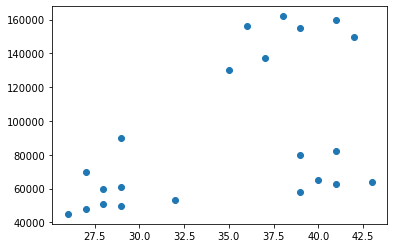

In [5]:
plt.scatter(df['Age'] ,df['Income($)'] )

In [6]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
y_predict = km.fit_predict(df[['Age','Income($)']])
y_predict

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [8]:
df['cluter'] = y_predict
df.head()

,Name,Age,Income($),cluter
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [9]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster==1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age,df1['Income($)'])
plt.scatter(df2.Age,df2['Income($)'])
plt.scatter(df3.Age,df3['Income($)'])

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

AttributeError: 'DataFrame' object has no attribute 'cluster'

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])
df

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age' , 'Income($)']])
y_predicted

In [ ]:
df['cluster'] = y_predicted
df.drop('cluter' , axis = 1,inplace=True)
df

In [ ]:
km.cluster_centers_

In [ ]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster==1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age,df1['Income($)'])
plt.scatter(df2.Age,df2['Income($)'])
plt.scatter(df3.Age,df3['Income($)'])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color = 'purple',marker='+')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [27]:
k_rng  = range(1,10)
sse = []
for k in  k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\Yash Gore\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
sse

[39748148458.54546,
 3318233941.1619043,
 1577046058.883117,
 843929723.0500001,
 296500418.0952381,
 231967084.46190482,
 174800337.7,
 120800257.03333335,
 93500268.41666666]

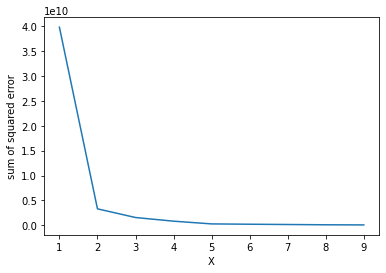

In [29]:
plt.xlabel('X')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)

In [10]:
# ##############

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()

In [12]:
dff= pd.DataFrame(iris.data,columns=iris.feature_names)
dff.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
dff['flower'] = iris.target
dff.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
dff.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns',inplace=True)

In [15]:
dff.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Text(0, 0.5, 'petal width (cm')

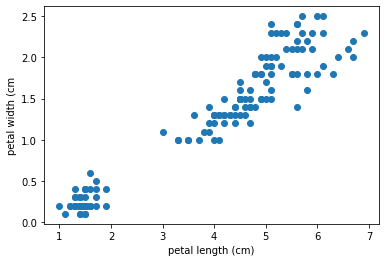

In [16]:
plt.scatter(dff['petal length (cm)'] ,dff['petal width (cm)'] )
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm')

In [17]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [18]:
y_predict = km.fit_predict(dff)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
dff['cluster'] = y_predict
dff

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [24]:
scaler = MinMaxScaler()
scaler.fit(dff[['petal width (cm)']])
dff['petal width (cm)'] = scaler.transform(dff[['petal width (cm)']])

scaler.fit(dff[['petal length (cm)']])
dff['petal length (cm)'] = scaler.transform(dff[['petal length (cm)']])
dff

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


No handles with labels found to put in legend.


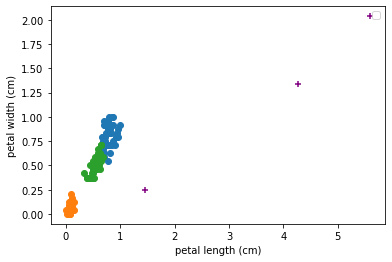

In [26]:
dff1 = dff[dff.cluster == 0]
dff2 = dff[dff.cluster==1]
dff3 = dff[dff.cluster == 2]

plt.scatter(dff1['petal length (cm)'],dff1['petal width (cm)'])
plt.scatter(dff2['petal length (cm)'],dff2['petal width (cm)'])
plt.scatter(dff3['petal length (cm)'],dff3['petal width (cm)'])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color = 'purple',marker='+')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

In [31]:
k_rng  = range(1,10)
sse = []
for k in  k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dff)
    sse.append(km.inertia_)

C:\Users\Yash Gore\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
sse

[128.26168655306046,
 38.399983315218336,
 1.8203046602036204,
 1.325516555185281,
 0.9084781144602996,
 0.746260794516437,
 0.6190982226692822,
 0.5453971621645238,
 0.47046400489245704]

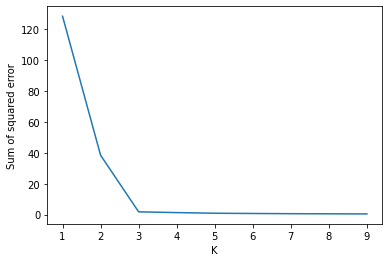

In [33]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)